In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

# For time stamps
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'MSFT', 'NFLX', 'TSLA']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'MSFT', 'NFLX', 'TSLA']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    
company_list = [AAPL, MSFT, NFLX, TSLA]
company_name = ["APPLE", "MICROSOFT", "NETFLIX", "TESLA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-05-16,165.649994,169.520004,164.350006,166.520004,166.520004,98288800,TESLA
2023-05-17,168.410004,174.500000,167.190002,173.860001,173.860001,125473600,TESLA
2023-05-18,174.220001,177.059998,172.449997,176.889999,176.889999,109520300,TESLA
2023-05-19,177.169998,181.949997,176.309998,180.139999,180.139999,136024200,TESLA
2023-05-22,180.699997,189.320007,180.110001,188.869995,188.869995,132001400,TESLA
2023-05-23,186.199997,192.960007,185.259995,185.770004,185.770004,156952100,TESLA
2023-05-24,182.229996,184.220001,178.220001,182.899994,182.899994,137605100,TESLA
2023-05-25,186.539993,186.779999,180.580002,184.470001,184.470001,96870700,TESLA
2023-05-26,184.619995,198.600006,184.529999,193.169998,193.169998,161765900,TESLA


In [2]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,151.290837,153.193387,149.667968,151.543154,151.041849,7.396103e+07
std,12.260174,12.037677,12.529712,12.350503,12.413896,2.245186e+07
min,126.010002,127.769997,124.169998,125.019997,124.656975,3.519590e+07
25%,142.699997,144.665001,140.934998,142.915001,142.287247,5.788065e+07
50%,149.899994,151.740005,148.169998,150.699997,150.103699,7.043370e+07
75%,160.924995,162.385002,159.565002,160.785004,160.549629,8.356920e+07
max,176.960007,178.990005,176.570007,177.301697,177.301697,1.647624e+08


In [3]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-05-31 to 2023-05-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


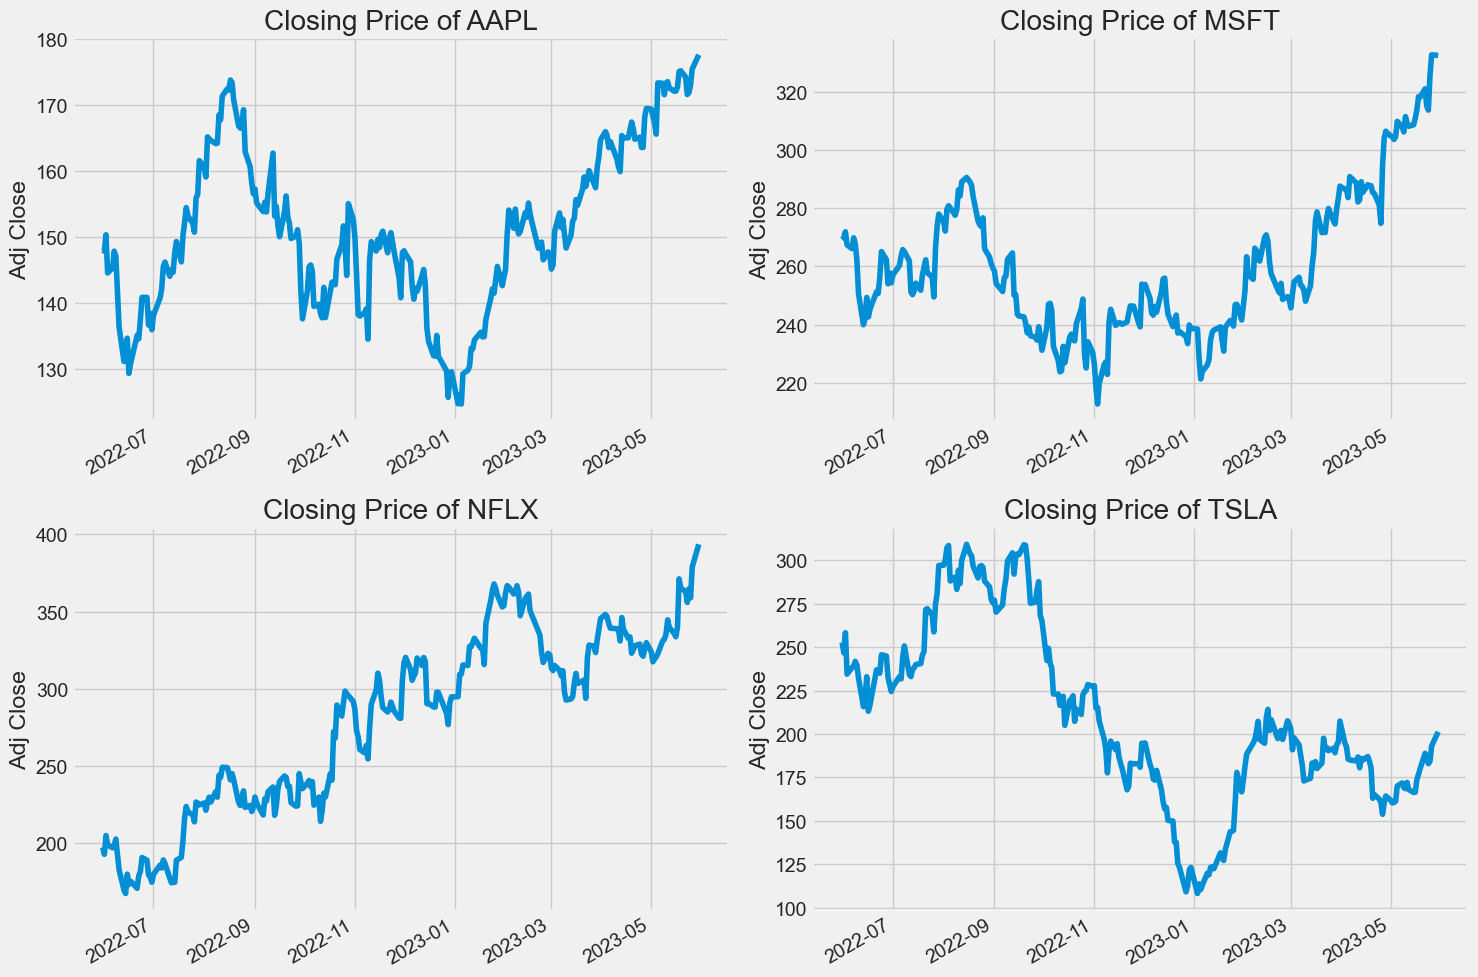

In [12]:
# Let's see a historical view of the closing price of all stocks
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

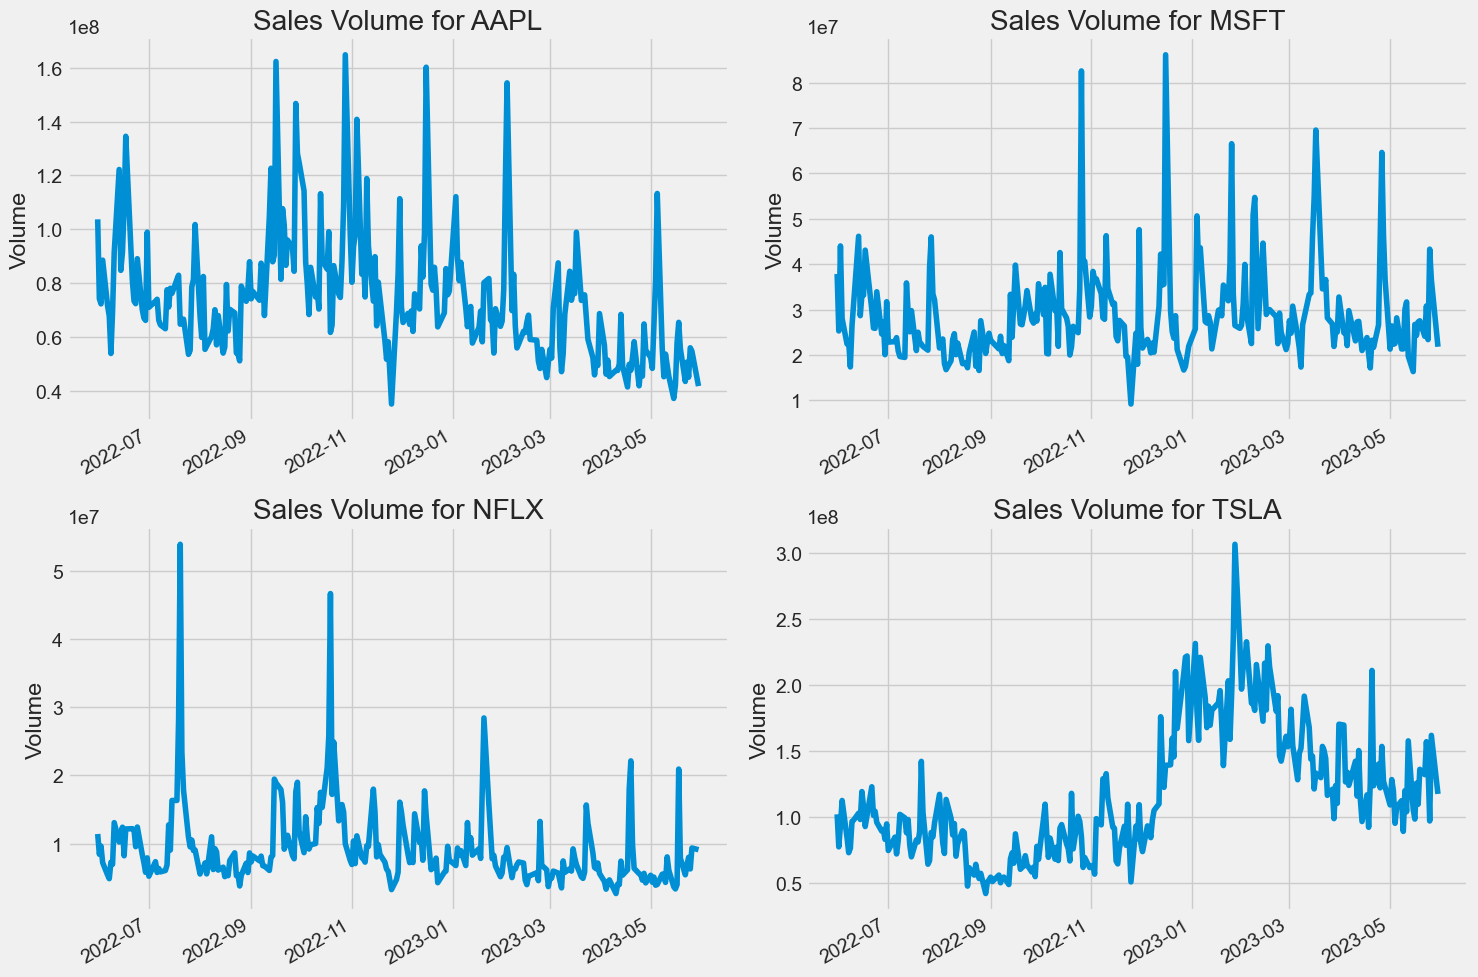

In [13]:
# Total volume of stock being traded each day plotted
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

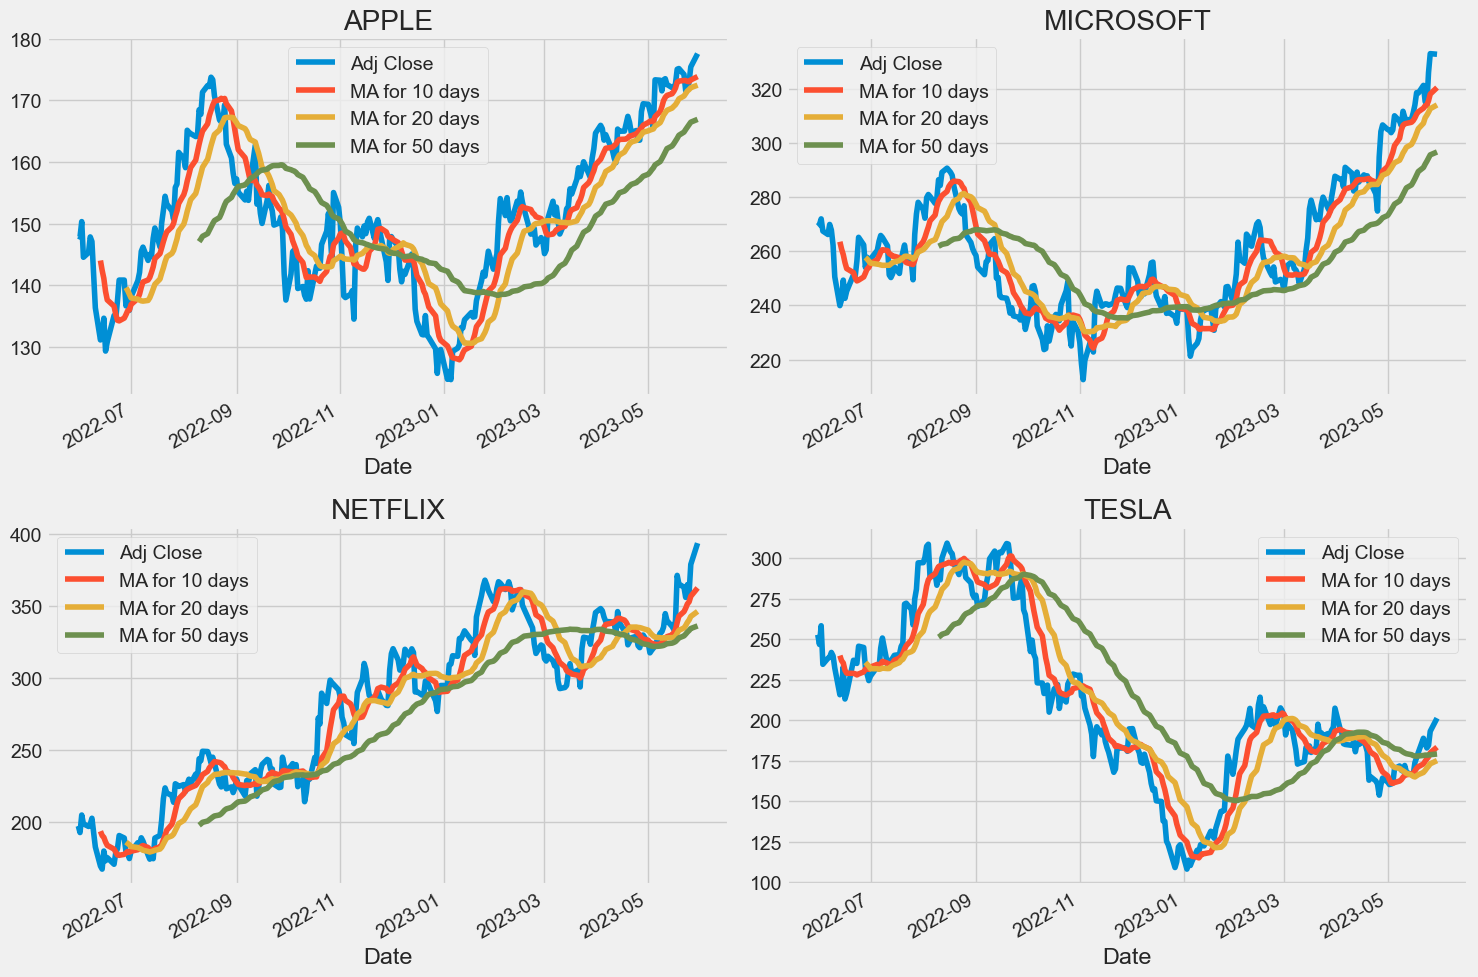

In [16]:
# Using the Moving Average 
# MA is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. 
# The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('MICROSOFT')

NFLX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('NETFLIX')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('TESLA')

fig.tight_layout()

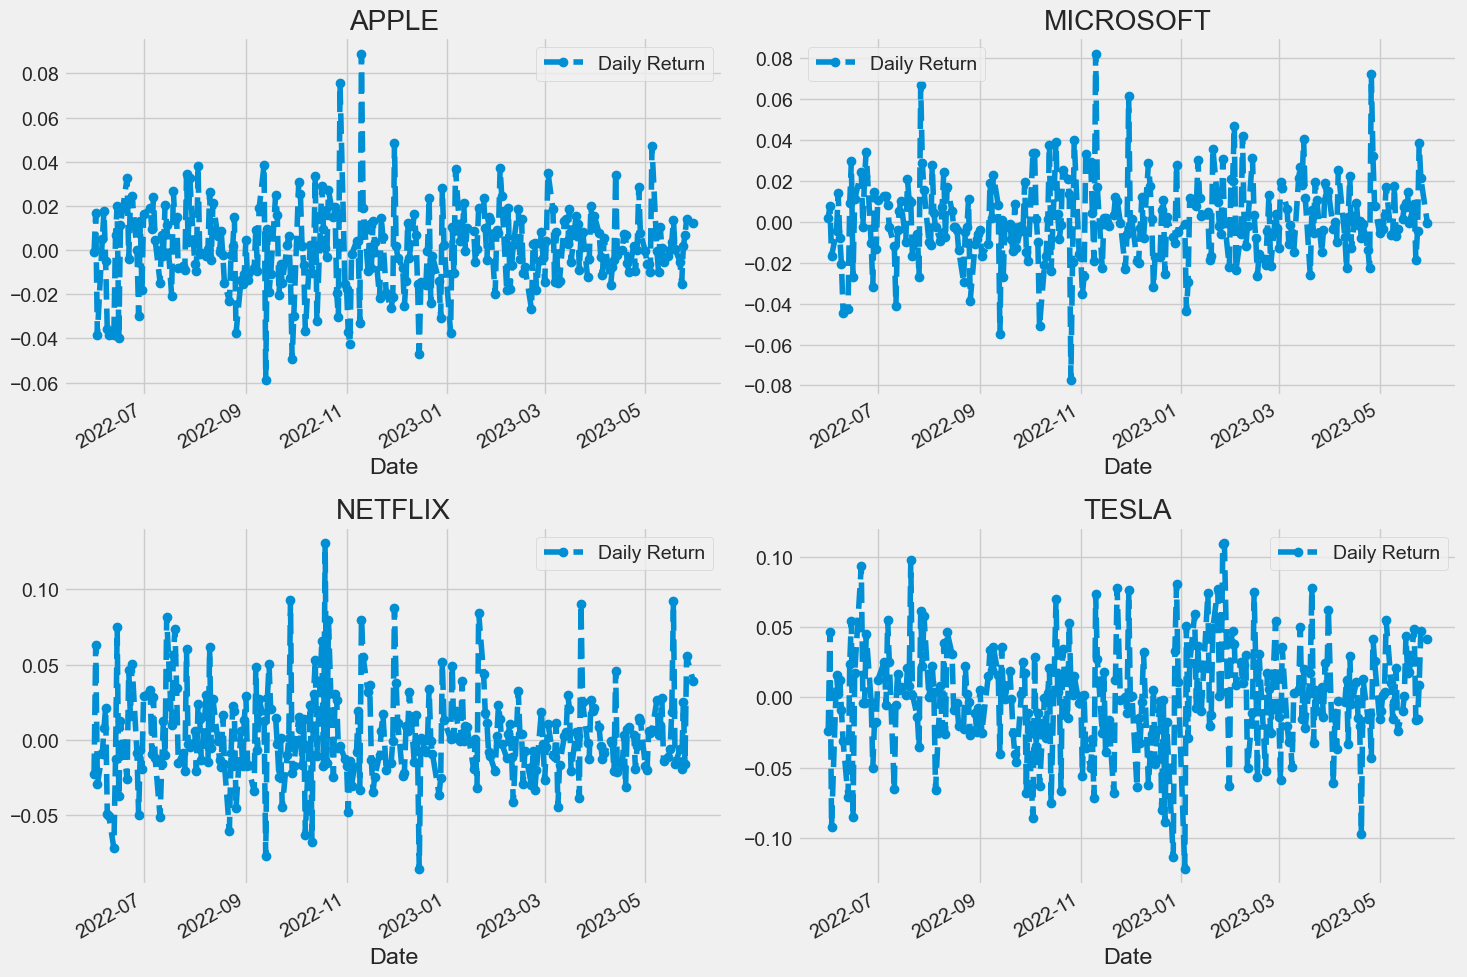

In [17]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

MSFT['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('MICROSOFT')

NFLX['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('NETFLIX')

TSLA['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('TESLA')

fig.tight_layout()

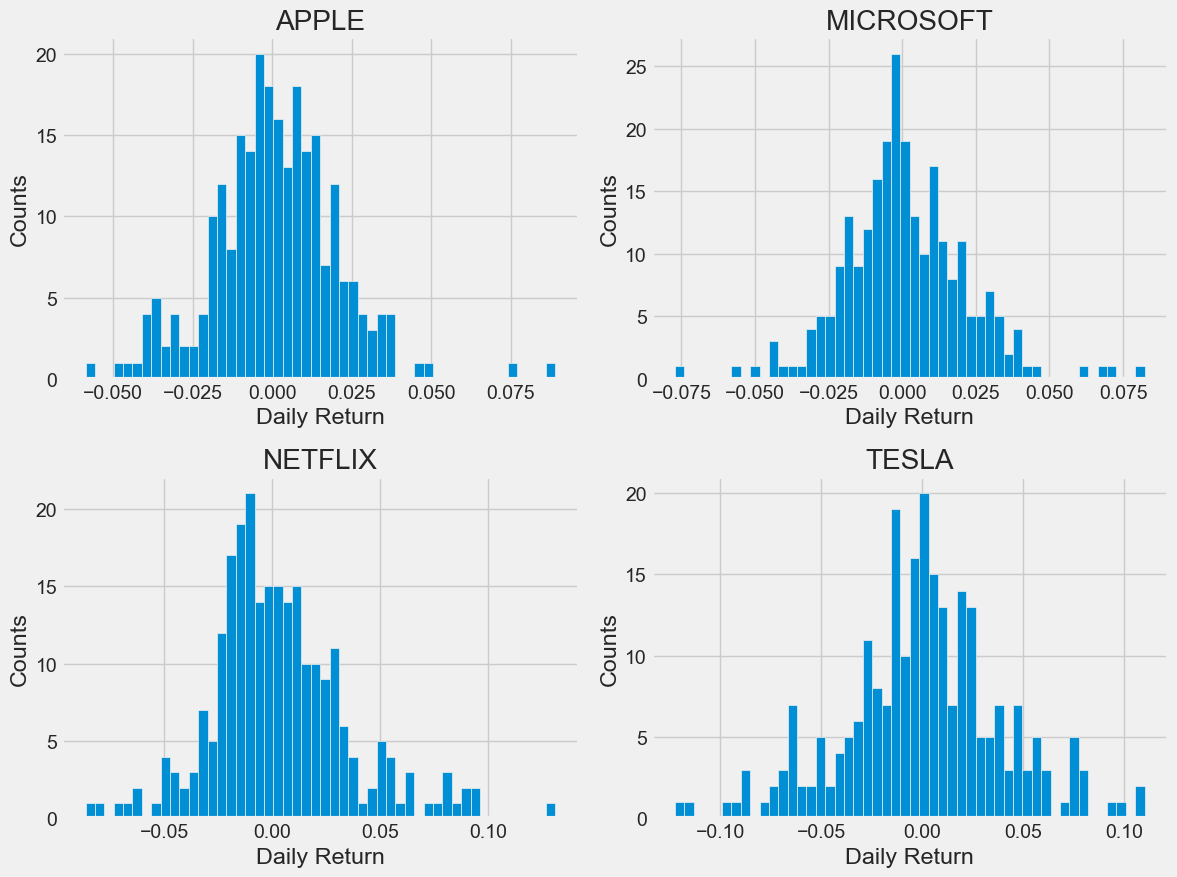

In [18]:
# Average daily return using a histogram and kde plot on the same figure -> from seaborn. 
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()